In [1]:
import torch

In [6]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor((1.0), requires_grad = True)

# Fwd pass
y_hat = w*x

loss = (y_hat - y)**2

# Bwd pass
loss.backward()
print(w.grad)

tensor(-2.)


## Gradient Descent Manual (numpy)

In [15]:
import numpy as np

# f = w* x
# f = 2*x

x = np.array([1,2,3,4], dtype=np.float32)
y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

# Model predict
def forward(x):
    return w*x

# loss MSE
def loss(y, y_prediction):
    return((y_prediction - y)**2).mean()

# gradient
# MSE = J = 1/N (wx-y)**2
# dJ/dw = 1/N 2*x (wx-y)
def gradient(x,y,y_prediction):
    return np.dot(2*x, y_prediction- y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')    

# Training
learning_rate = 0.01
n_iter = 5

for epoch in range(n_iter):
#     forward
    y_pred = forward(x)
    
#     loss
    l = loss(y, y_pred)
    
#     grad
    dw = gradient(x,y,y_pred)
    
#     update weight
    w -= learning_rate * dw
    
    if epoch % 1 == 0:
        print(f'epoch{epoch+1}:w = {w:.3f}, loss = {l:0.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')   

Prediction before training: f(5) = 0.000
epoch1:w = 1.200, loss = 30.00000000
epoch2:w = 1.680, loss = 4.79999924
epoch3:w = 1.872, loss = 0.76800019
epoch4:w = 1.949, loss = 0.12288000
epoch5:w = 1.980, loss = 0.01966083
Prediction after training: f(5) = 9.898


## Gradient Descent torch_1

In [20]:
import torch

# f = w*x, w=2

x = torch.tensor([1,2,3,4], dtype = torch.float32)
y = torch.tensor([2,4,6,8], dtype = torch.float32)

w = torch.tensor(0.0, dtype= torch.float32, requires_grad = True)


# forward pass
def forward(x):
    return w*x

def loss(y, y_prediction):
    return ((y_prediction - y)**2).mean()


learning_rate = 0.01
n_iter = 100

print(f'Prediction before training: f(5) = {forward(5):.3f}') 

for epoch in range(n_iter):
    y_pred = forward(x)
    
    l = loss(y, y_pred)
    
#     backward pass
    l.backward()
    
#     update weights
    with torch.no_grad():
        w -= learning_rate*w.grad
        
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'epoch{epoch+1}:w = {w:.3f}, loss = {l:0.8f}')
    
    
    
    
print(f'Prediction after training: f(5) = {forward(5):.3f}')     

Prediction before training: f(5) = 0.000
epoch1:w = 0.300, loss = 30.00000000
epoch11:w = 1.665, loss = 1.16278565
epoch21:w = 1.934, loss = 0.04506890
epoch31:w = 1.987, loss = 0.00174685
epoch41:w = 1.997, loss = 0.00006770
epoch51:w = 1.999, loss = 0.00000262
epoch61:w = 2.000, loss = 0.00000010
epoch71:w = 2.000, loss = 0.00000000
epoch81:w = 2.000, loss = 0.00000000
epoch91:w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [22]:
import torch
import torch.nn as nn

# f = w*x, w=2

x = torch.tensor([1,2,3,4], dtype = torch.float32)
y = torch.tensor([2,4,6,8], dtype = torch.float32)

w = torch.tensor(0.0, dtype= torch.float32, requires_grad = True)


# forward pass
def forward(x):
    return w*x

# # loss

# def loss(y, y_prediction):
#     return ((y_prediction - y)**2).mean()


learning_rate = 0.01
n_iter = 100

# loss
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = learning_rate)

print(f'Prediction before training: f(5) = {forward(5):.3f}') 

for epoch in range(n_iter):
    y_pred = forward(x)
    
    l = loss(y, y_pred)
    
#     backward pass
    l.backward()
    
#     update weights
    optimizer.step()
#     with torch.no_grad():
#         w -= learning_rate*w.grad
        
#     w.grad.zero_()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f'epoch{epoch+1}:w = {w:.3f}, loss = {l:0.8f}')
    
    
    
    
print(f'Prediction after training: f(5) = {forward(5):.3f}')     

Prediction before training: f(5) = 0.000
epoch1:w = 0.300, loss = 30.00000000
epoch11:w = 1.665, loss = 1.16278565
epoch21:w = 1.934, loss = 0.04506890
epoch31:w = 1.987, loss = 0.00174685
epoch41:w = 1.997, loss = 0.00006770
epoch51:w = 1.999, loss = 0.00000262
epoch61:w = 2.000, loss = 0.00000010
epoch71:w = 2.000, loss = 0.00000000
epoch81:w = 2.000, loss = 0.00000000
epoch91:w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [54]:
import torch

# f = w*x, w=2

X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32)

# w = torch.tensor(0.0, dtype= torch.float32, requires_grad = True)

X_test = torch.tensor([5], dtype = torch.float32)
n_samples, n_features = X.shape

input_size = n_features
output_size = n_features

# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        
        #define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self,x):
        return self.lin(x)
        
model = LinearRegression(input_size, output_size)        

# # forward pass
# def forward(x):
#     return w*x

learning_rate = 0.01
n_iter = 100

# loss
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}') 

for epoch in range(n_iter):
    y_pred = model(X)
#     y_pred = forward(x)
    
    l = loss(Y, y_pred)
    
#     backward pass
    l.backward()
    
#     update weights
    optimizer.step()
#     with torch.no_grad():
#         w -= learning_rate*w.grad
        
#     w.grad.zero_()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch{epoch+1}:w = {w[0][0].item():.3f}, loss = {l:0.8f}')
    
    
    
    
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}') 

Prediction before training: f(5) = 1.810
epoch1:w = 0.741, loss = 22.21310806
epoch11:w = 1.819, loss = 0.57566243
epoch21:w = 1.992, loss = 0.01579435
epoch31:w = 2.019, loss = 0.00125680
epoch41:w = 2.023, loss = 0.00083130
epoch51:w = 2.023, loss = 0.00077380
epoch61:w = 2.022, loss = 0.00072852
epoch71:w = 2.022, loss = 0.00068611
epoch81:w = 2.021, loss = 0.00064618
epoch91:w = 2.020, loss = 0.00060856
Prediction after training: f(5) = 10.041


In [48]:
# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')
# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch
input_size = n_features
output_size = n_features

# we can call this model with samples X
# model = nn.Linear(input_size, output_size)


class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
model = LinearRegression(input_size, output_size)


print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

#samples: 4, #features: 1
Prediction before training: f(5) = 2.293
epoch  1 : w =  0.7221152782440186  loss =  tensor(18.2752, grad_fn=<MseLossBackward0>)
epoch  11 : w =  1.7039498090744019  loss =  tensor(0.4894, grad_fn=<MseLossBackward0>)
epoch  21 : w =  1.864549994468689  loss =  tensor(0.0283, grad_fn=<MseLossBackward0>)
epoch  31 : w =  1.8929768800735474  loss =  tensor(0.0155, grad_fn=<MseLossBackward0>)
epoch  41 : w =  1.9000672101974487  loss =  tensor(0.0143, grad_fn=<MseLossBackward0>)
epoch  51 : w =  1.9036511182785034  loss =  tensor(0.0134, grad_fn=<MseLossBackward0>)
epoch  61 : w =  1.906598687171936  loss =  tensor(0.0127, grad_fn=<MseLossBackward0>)
epoch  71 : w =  1.9093741178512573  loss =  tensor(0.0119, grad_fn=<MseLossBackward0>)
epoch  81 : w =  1.9120537042617798  loss =  tensor(0.0112, grad_fn=<MseLossBackward0>)
epoch  91 : w =  1.9146519899368286  loss =  tensor(0.0106, grad_fn=<MseLossBackward0>)
Prediction after training: f(5) = 9.829


## Linear Regression

epoch:10, loss=4384.6855
epoch:20, loss=3271.2812
epoch:30, loss=2465.7146
epoch:40, loss=1882.2485
epoch:50, loss=1459.2300
epoch:60, loss=1152.2557
epoch:70, loss=929.3032
epoch:80, loss=767.2484
epoch:90, loss=649.3734
epoch:100, loss=563.5771


<function matplotlib.pyplot.show(*args, **kw)>

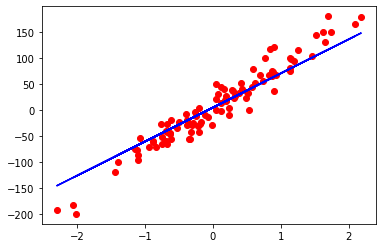

In [57]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


#Prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise=20, random_state = 1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0],1)

n_samples, n_features = X.shape


# 1) Model

input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# 2) Loss and optimiser

criterion = nn.MSELoss()
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 3) tarining step

num_epochs = 100

for epoch in range(num_epochs):
    #forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    #bwd pass
    loss.backward()
    
    #update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print(f'epoch:{epoch+1}, loss={loss.item():.4f}')
        
        
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show

## Logistic regression

In [68]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
# from sklearn.preprocessing import StandardScalar
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Prepare data

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

# Scale

sc= StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


# Model
# f = wx+b, sigmoid at end

class LogisticRegression(nn.Module):
    def __init__(self,n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self,X):
        y_predicted = torch.sigmoid(self.linear(X))
        return y_predicted
    

model = LogisticRegression(n_features)


# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training step

num_epochs = 100

for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    #bwd pass
    loss.backward()
    
    #updates
    optimizer.step()
    
    #zero grad
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print(f'epoch:{epoch+1}, loss={loss.item():.4f}')
        
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_cls = y_pred.round()
    
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    
print(f'accuracy = {acc:.4f}')

epoch:10, loss=0.6587
epoch:20, loss=0.5328
epoch:30, loss=0.4544
epoch:40, loss=0.4012
epoch:50, loss=0.3626
epoch:60, loss=0.3330
epoch:70, loss=0.3096
epoch:80, loss=0.2904
epoch:90, loss=0.2743
epoch:100, loss=0.2607
accuracy = 0.8947


## Dataset and Dataloader

In [29]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


class WineDataset(Dataset):
    
    def __init__(self, transform = None):
        #load data
        xy = np.loadtxt('/Users/animesh/Downloads/wine.csv', delimiter = ",", dtype=np.float32, skiprows = 1)
        self.n_samples = xy.shape[0]
        
        self.x = xy[:,1:]
        self.y = xy[:,[0]]
        
        self.transform = transform
        
    def __getitem__(self,index):
        sample = self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    def __len__(self):
        return self.n_samples

class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    
class MulTransform:
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, sample):
        inputs, target = sample
        inputs *= self.factor
        
        return inputs, target

dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels, type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(10)])

dataset = WineDataset(transform = composed)
first_data = dataset[0]
features, labels = first_data
print(features, labels, type(features), type(labels))

dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle = True, num_workers = 0)

dataiter = iter(dataloader)
data = next(dataiter)
# data = dataiter.next()
features, labels = data
print(features, labels, type(features), type(labels))


#Dummy training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        #fwd bwd, update
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.] <class 'numpy.ndarray'> <class 'numpy.ndarray'>
tensor([1.4230e+02, 1.7100e+01, 2.4300e+01, 1.5600e+02, 1.2700e+03, 2.8000e+01,
        3.0600e+01, 2.8000e+00, 2.2900e+01, 5.6400e+01, 1.0400e+01, 3.9200e+01,
        1.0650e+04]) tensor([1.]) <class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([[1.1620e+02, 1.9900e+01, 2.2800e+01, 1.8000e+02, 9.8000e+02, 3.0200e+01,
         2.2600e+01, 1.7000e+00, 1.3500e+01, 3.2500e+01, 1.1600e+01, 2.9600e+01,
         3.4500e+03],
        [1.3680e+02, 1.8300e+01, 2.3600e+01, 1.7200e+02, 1.0400e+03, 2.4200e+01,
         2.6900e+01, 4.2000e+00, 1.9700e+01, 3.8400e+01, 1.2300e+01, 2.8700e+01,
         9.9000e+03],
        [1.3050e+02, 2.0500e+01, 3.2200e+01, 2.5000e+02, 1.2400e+03, 2.6300e+01,
         2.6800e+01, 4.7000e+00, 1.9200e+01, 3.5800e+01, 1.1300e+01, 3.2000e+01,
         8.3000e+03],
        [1.2370e+02, 1

## Softmax

In [33]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis = 0)

x = np.array([2.0,1.0,0.1])
outputs = softmax(x)
print(outputs)

x = torch.tensor([2.0,1.0,0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)

[0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])


## Cross-entropy loss

In [37]:
import torch
import torch.nn as nn
import numpy as np

def cross_entropy(actual, predicted):
    loss = -np.sum(actual*np.log(predicted))
    return loss

# y must be one hot encoded
Y = np.array([1,0,0])
y_pred_good = np.array([0.7,0.2,0.1])

l1 = cross_entropy(Y, y_pred_good)

print(f'Loss1 numpy: {l1:0.4f}')

Loss1 numpy: 0.3567


In [44]:
loss = nn.CrossEntropyLoss()
Y = torch.tensor([0])

# n_samples x n_classes = 1 x 3

y_pred_good = torch.tensor([[2.0,1.0,0.1]])

l1 = loss(y_pred_good, Y)

print(l1.item())

_, prediction1 = torch.max(y_pred_good, 1)
print(prediction1)

0.4170299470424652
tensor([0])


In [46]:
loss = nn.CrossEntropyLoss()
Y = torch.tensor([2,0,1])

# n_samples x n_classes = 1 x 3


Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1
Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')

Batch Loss1:  0.2834
Batch Loss2: 1.6418
Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


## Feed Forward 

torch.Size([100, 1, 28, 28]) torch.Size([100])


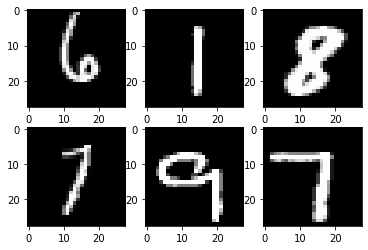

epochs 1/2, step 100/600, loss = 0.4565
epochs 1/2, step 200/600, loss = 0.3749
epochs 1/2, step 300/600, loss = 0.2957
epochs 1/2, step 400/600, loss = 0.2399
epochs 1/2, step 500/600, loss = 0.2697
epochs 1/2, step 600/600, loss = 0.2947
epochs 2/2, step 100/600, loss = 0.1793
epochs 2/2, step 200/600, loss = 0.3308
epochs 2/2, step 300/600, loss = 0.0877
epochs 2/2, step 400/600, loss = 0.1434
epochs 2/2, step 500/600, loss = 0.1456
epochs 2/2, step 600/600, loss = 0.0691
95.64


In [60]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
# import numoy as np

#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Hyperparameters
input_size = 784 #28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#MNIST 
train_dataset = torchvision.datasets.MNIST(root='./data', train =True, transform = transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train =False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap = 'gray')
    
plt.show()

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

# loss optimzer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        #fwd pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #bwd
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100 == 0:
            print(f'epochs {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
            
            
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        #values, index
        _, predictions = torch.max(outputs, 1)
        
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0*n_correct/n_samples
    
    print(acc)



## Convolution Neural Network

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt

# device conifg
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

# hyper parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

# dataset
transform = transforms.Compose([transforms.ToTensor(), transfroms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_dataset = torchvision.datasets.CIFAR10(root'./data', train = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root'./data', train = False, transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle=False)

class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self)__init__()
        self.conv1 = nn.conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = nn.optim.SGD(model_parameters(), lr = learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        
        #fwd pass
        output = model(images)
        loss = criterion(output, labels)
        
        #bwd pass
        optimizer.zero_grad()
        loss.backwards()
        optimizer.step()
        

In [5]:
pip install tensorboard



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
%tensorboard --logdir=runs

UsageError: Line magic function `%tensorboard` not found.


## Tensorboard

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import sys

writer = SummaryWriter("runs/mnist")
# import numoy as np

#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Hyperparameters
input_size = 784 #28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#MNIST 
train_dataset = torchvision.datasets.MNIST(root='./data', train =True, transform = transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train =False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap = 'gray')
    
# plt.show()
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)

writer.close()
sys.exit()

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

# loss optimzer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        #fwd pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #bwd
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100 == 0:
            print(f'epochs {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
            
            
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        #values, index
        _, predictions = torch.max(outputs, 1)
        
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0*n_correct/n_samples
    
    print(acc)



torch.Size([100, 1, 28, 28]) torch.Size([100])


NameError: name 'example_data' is not defined

In [2]:
tensorboard --logdir = runs

SyntaxError: can't assign to operator (<ipython-input-2-36ce4a8e0f14>, line 1)